In [1]:
import torch
import os
import dataset
from PIL import Image, ImageDraw
import numpy as np
import torchvision.transforms as transforms
from dataset import classes_dic

In [2]:
yolo = torch.load("../model/model.pkl")

In [3]:
def draw_line(draw, center_h, center_w, y, x, h, w, color="red"):
    print
    rate_xy = 224 / 7
    rate_hw = 224
    
    h, w = rate_hw * h, rate_hw * w
    y, x = rate_xy * y, rate_xy * x
    
    center_y = rate_xy*center_h + y
    center_x = rate_xy*center_w + x
    
    top_x = center_x - w / 2
    top_y = center_y - h / 2
    
    down_x = center_x + w / 2
    down_y = center_y + h / 2

    draw.line([(top_x, top_y), (top_x, down_y), (down_x, down_y), (down_x, top_y), (top_x, top_y)], fill=color)

def get_key(classes_dic, value):
    return [k for k, v in classes_dic.items() if v == value]

In [4]:
transform_train = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),])

train_dataset = dataset.Voc17(transform=transform_train, is_train=False)
train_iter = iter(train_dataset)

['cat']
1:  ['person']
2:  ['person']


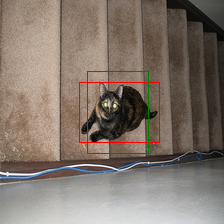

In [28]:
data = next(train_iter)
image = data["image"]

image = image.reshape(1, 3, 224, 224)
label = data["label"]
ciamge = image.type(torch.FloatTensor)
ciamge = ciamge.to("cuda")
out = yolo(ciamge)

img = data['origin'][0]
img = img.resize((224, 224), Image.ANTIALIAS)
draw = ImageDraw.Draw(img)
for h in range(7):
    for w in range(7):
        if label[h, w, 20] > 0.9:
            draw_line(draw, h, w, label[h, w, 21], label[h, w, 22], label[h, w, 23], label[h, w, 24], color="red")
            print(get_key(classes_dic, np.argmax(label[h, w, :20])))
        if out[0, h, w, 20] > 0.8:
            draw_line(draw, h, w, out[0, h, w, 21], out[0, h, w, 22], out[0, h, w, 23], out[0, h, w, 24], color="blue")
            print("1: ", get_key(classes_dic, np.argmax(out[0, h, w, :20].cpu().detach().numpy())))
        if out[0, h, w, 25] > 0.8:
            draw_line(draw, h, w, out[0, h, w, 26], out[0, h, w, 27], out[0, h, w, 28], out[0, h, w, 29], color="green")
            print("2: ", get_key(classes_dic, np.argmax(out[0, h, w, :20].cpu().detach().numpy())))
img